In [47]:
import pandas as pd

In [48]:
dataframe = pd.read_csv("./business_analysis.csv")

In [49]:
dataframe.columns

Index(['index', 'name', 'category', 'category_group', 'address', 'city',
       'neighborhood', 'latitude', 'longitude', 'has_coordinates', 'plus_code',
       'phone', 'has_phone', 'website', 'has_website', 'needs_website',
       'rating', 'review_count', 'engagement_level', 'num_photos',
       'has_photos', 'num_review_photos', 'total_images',
       'num_reviews_with_text', 'reviews_with_photos', 'price_level',
       'has_opening_hours', 'days_with_hours', 'has_accessibility',
       'accessibility', 'has_amenities', 'amenities', 'has_payments',
       'payments', 'has_parking', 'parking', 'has_service_options',
       'service_options', 'has_highlights', 'highlights', 'data_completeness',
       'image_score', 'review_score', 'rating_score', 'overall_quality',
       'is_good_candidate', 'is_premium_candidate', 'maps_url', 'place_id',
       'scraped_at'],
      dtype='str')

In [50]:
dataframe.shape

(1486, 50)

In [51]:
dataframe.head(5)

,index,name,category,category_group,address,city,neighborhood,latitude,longitude,has_coordinates,...,data_completeness,image_score,review_score,rating_score,overall_quality,is_good_candidate,is_premium_candidate,maps_url,place_id,scraped_at
0,0,Villa Morra Park,Restaurante,Food & Beverage,"Av. Mariscal López, Asunción 001411",Villa Morra,Villa Morra,-25.292925,-57.585849,True,...,75,2,1,3,6.25,True,False,NaN,NaN,2026-01-30T21:05:01.523686
1,1,D´Alepo Cocina,Restaurante,Food & Beverage,"Olegario Víctor Andrade, Senador Huey Pierce L...",Villa Morra,Villa Morra,-25.292925,-57.585849,True,...,90,2,2,3,7.70,True,False,NaN,NaN,2026-01-30T21:05:25.190359
2,2,Treffen Bistró Fusión,Restaurante,Food & Beverage,"&, Asunción 001411",Villa Morra,Villa Morra,-25.288145,-57.597478,True,...,90,2,1,2,6.37,True,False,NaN,NaN,2026-01-30T21:06:13.437743
3,3,Bucca Villa Morra,Restaurante paraguayo,Food & Beverage,"O'Higgins esq, Asunción 001411",Villa Morra,Villa Morra,-25.287036,-57.582974,True,...,90,2,1,2,6.37,True,False,NaN,NaN,2026-01-30T21:06:38.061151
4,4,La Tarantella Rooftop - Villamorra,Pizzería,Other,"Guido Spano, Asunción 001411",Villa Morra,Villa Morra,-25.287036,-57.582974,True,...,75,1,1,2,4.92,True,False,NaN,NaN,2026-01-30T21:06:58.949185


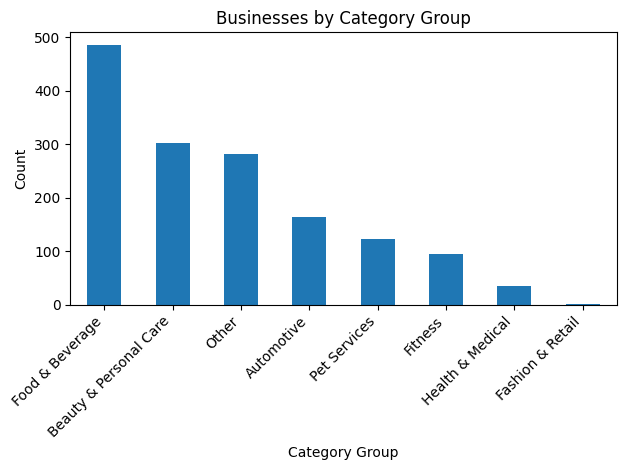

In [52]:
import matplotlib.pyplot as plt

dataframe['category_group'].value_counts().plot(kind='bar')
plt.title("Businesses by Category Group")
plt.xlabel("Category Group")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.tight_layout()
plt.show()


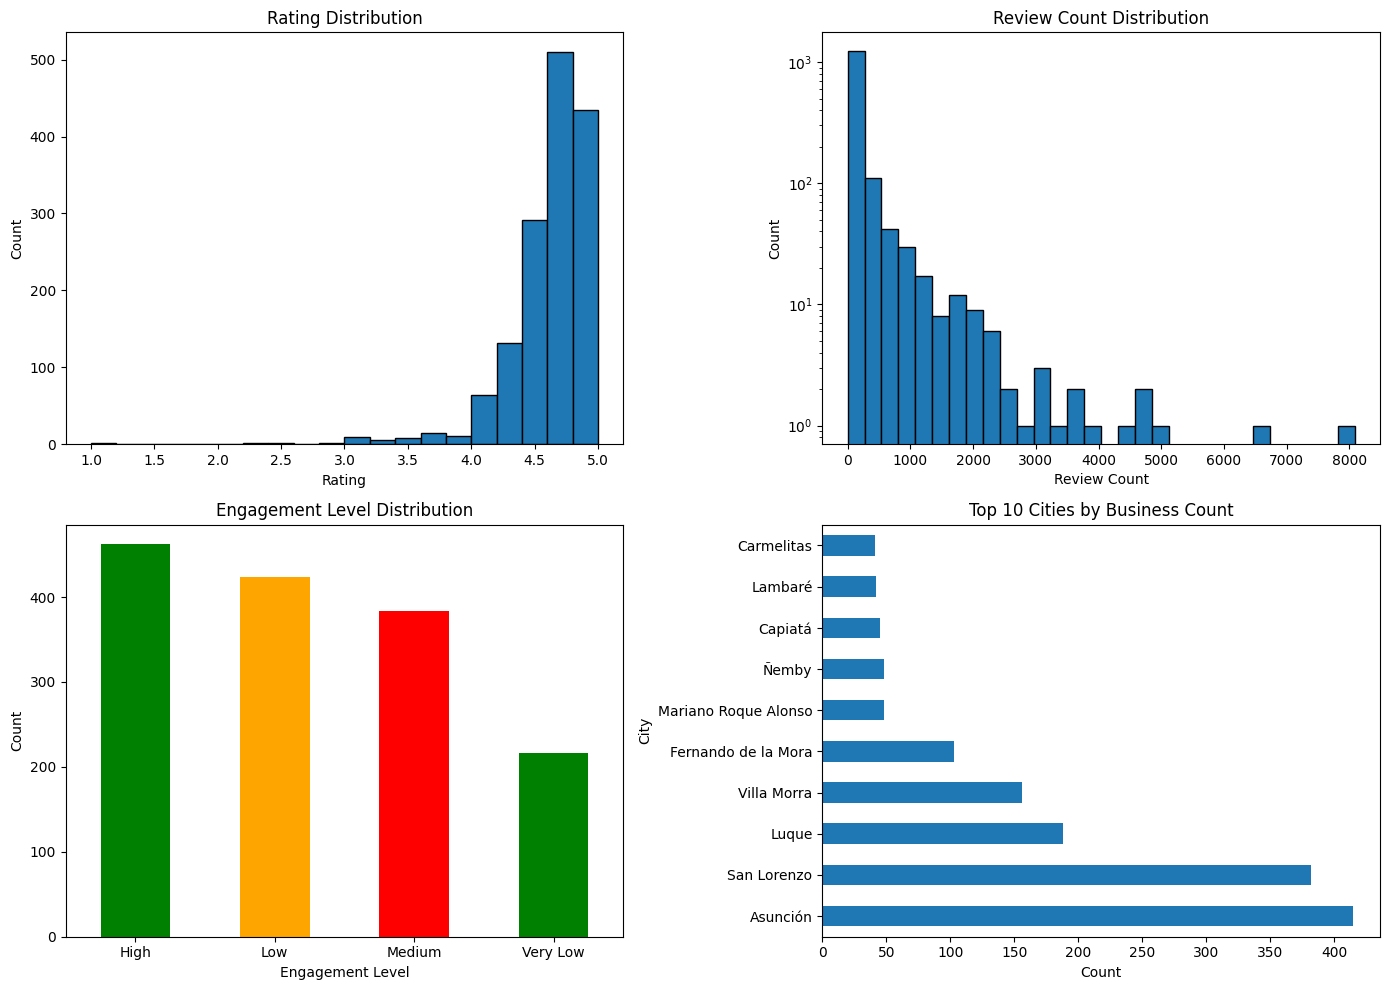

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Rating distribution
axes[0, 0].hist(dataframe['rating'].dropna(), bins=20, edgecolor='black')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

# 2. Review count distribution (log scale for better visualization)
axes[0, 1].hist(dataframe['review_count'].dropna(), bins=30, edgecolor='black')
axes[0, 1].set_title('Review Count Distribution')
axes[0, 1].set_xlabel('Review Count')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_yscale('log')

# 3. Engagement level distribution
dataframe['engagement_level'].value_counts().plot(kind='bar', ax=axes[1, 0], color=['green', 'orange', 'red'])
axes[1, 0].set_title('Engagement Level Distribution')
axes[1, 0].set_xlabel('Engagement Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Top 10 cities by business count
dataframe['city'].value_counts().head(10).plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Cities by Business Count')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('City')

plt.tight_layout()
plt.show()

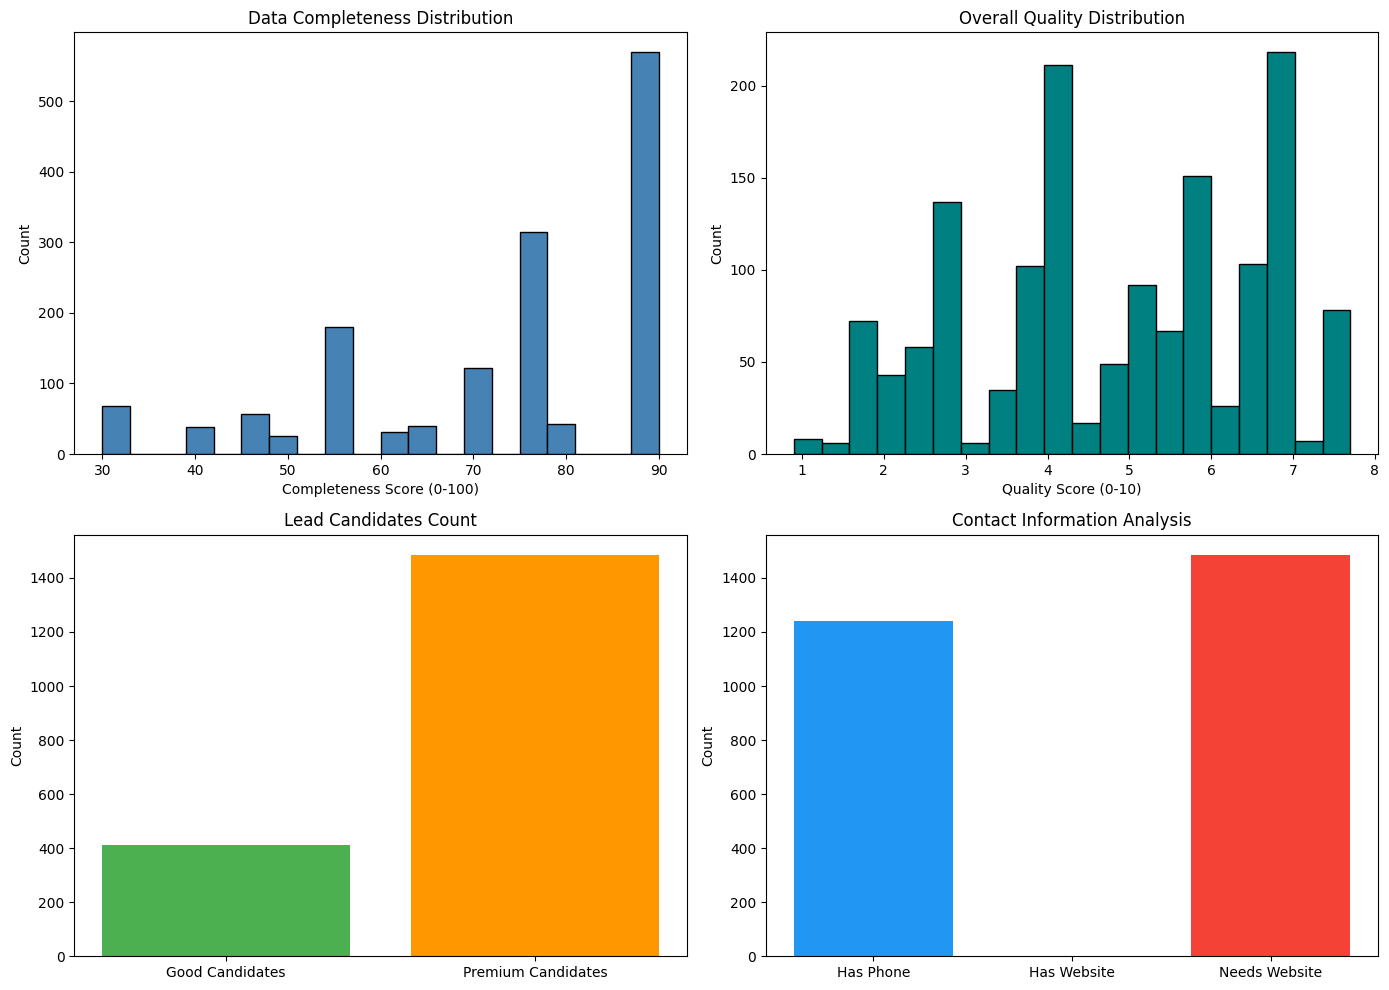

=== DATA INSIGHTS ===
Total businesses: 1486
Average rating: 4.62
Average review count: 209.5
Good candidates: 413 (27.8%)
Businesses needing websites: 1486 (100.0%)
Average data completeness: 73.0%


In [69]:
# Data Quality & Lead Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Data Completeness Distribution
axes[0, 0].hist(dataframe['data_completeness'].dropna(), bins=20, edgecolor='black', color='steelblue')
axes[0, 0].set_title('Data Completeness Distribution')
axes[0, 0].set_xlabel('Completeness Score (0-100)')
axes[0, 0].set_ylabel('Count')

# 2. Overall Quality Distribution
axes[0, 1].hist(dataframe['overall_quality'].dropna(), bins=20, edgecolor='black', color='teal')
axes[0, 1].set_title('Overall Quality Distribution')
axes[0, 1].set_xlabel('Quality Score (0-10)')
axes[0, 1].set_ylabel('Count')

# 3. Good Candidates vs Premium Candidates
candidate_data = [dataframe['is_good_candidate'].sum(), dataframe['is_premium_candidate'].notna().sum()]
axes[1, 0].bar(['Good Candidates', 'Premium Candidates'], candidate_data, color=['#4CAF50', '#FF9800'])
axes[1, 0].set_title('Lead Candidates Count')
axes[1, 0].set_ylabel('Count')

# 4. Contact Info Analysis
contact_data = {
    'Has Phone': dataframe['has_phone'].sum(),
    'Has Website': dataframe['has_website'].sum(),
    'Needs Website': dataframe['needs_website'].sum()
}
axes[1, 1].bar(contact_data.keys(), contact_data.values(), color=['#2196F3', '#9C27B0', '#F44336'])
axes[1, 1].set_title('Contact Information Analysis')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Key Statistic
print("=== DATA INSIGHTS ===")
print(f"Total businesses: {len(dataframe)}")
print(f"Average rating: {dataframe['rating'].mean():.2f}")
print(f"Average review count: {dataframe['review_count'].mean():.1f}")
print(f"Good candidates: {dataframe['is_good_candidate'].sum()} ({dataframe['is_good_candidate'].mean()*100:.1f}%)")
print(f"Businesses needing websites: {dataframe['needs_website'].sum()} ({dataframe['needs_website'].mean()*100:.1f}%)")
print(f"Average data completeness: {dataframe['data_completeness'].mean():.1f}%")

In [70]:
# Análisis de candidatos y páginas web
print("=== ANÁLISIS DE CANDIDATOS Y WEBSITES ===\n")

# Candidatos buenos
good_candidates = dataframe['is_good_candidate'].sum()
print(f"Candidatos buenos: {good_candidates}")

# Candidatos premium (contando valores no nulos que no sean False)
premium_candidates = dataframe['is_premium_candidate'].notna().sum()
premium_true = dataframe['is_premium_candidate'].dropna()
print(f"Candidatos premium (registros con datos): {premium_candidates}")

# Análisis de páginas web
total_registros = len(dataframe)
sin_website = dataframe['has_website'].sum() == 0  # Si ninguno tiene website
necesitan_website = dataframe['needs_website'].sum()

print(f"\n=== ANÁLISIS DE WEBSITES ===")
print(f"Total de registros: {total_registros}")
print(f"Registros CON website: {dataframe['has_website'].sum()}")
print(f"Registros SIN website: {(~dataframe['has_website'].astype(bool)).sum()}")
print(f"Registros que NECESITAN website: {necesitan_website} ({necesitan_website/total_registros*100:.1f}%)")


=== ANÁLISIS DE CANDIDATOS Y WEBSITES ===

Candidatos buenos: 413
Candidatos premium (registros con datos): 1486

=== ANÁLISIS DE WEBSITES ===
Total de registros: 1486
Registros CON website: 0
Registros SIN website: 1486
Registros que NECESITAN website: 1486 (100.0%)


In [71]:
# Análisis de mejores prospectos para venta de websites
print("=== TOP PROSPECTOS PARA VENTA DE WEBSITES ===\n")

# Crear un score de probabilidad de compra basado en múltiples factores
prospects = dataframe[dataframe['needs_website'] == True].copy()

# Calcular score de prospecto
prospects['prospect_score'] = (
    prospects['rating'].fillna(0) * 2 +  # Buen rating = negocio establecido
    prospects['review_count'].clip(upper=500).fillna(0) / 50 +  # Reviews = actividad
    prospects['has_phone'].astype(int) * 3 +  # Tiene teléfono = contactable
    prospects['data_completeness'].fillna(0) / 10 +  # Datos completos = negocio organizado
    prospects['is_good_candidate'].astype(int) * 5 +  # Ya identificado como buen candidato
    (prospects['engagement_level'] == 'High').astype(int) * 3  # Alto engagement
)

# Ordenar por score
top_prospects = prospects.nlargest(20, 'prospect_score')[['name', 'category', 'city', 'rating', 'review_count', 'has_phone', 'phone', 'engagement_level', 'data_completeness', 'prospect_score']]

print(f"Total de negocios que necesitan website: {len(prospects)}")
print(f"Negocios con alta probabilidad de compra (score > 20): {len(prospects[prospects['prospect_score'] > 20])}\n")

print("=== TOP 20 MEJORES PROSPECTOS ===\n")
display(top_prospects)

# Resumen por categoría
print("\n=== DISTRIBUCIÓN POR CATEGORÍA (Top prospectos) ===")
print(top_prospects['category'].value_counts())

=== TOP PROSPECTOS PARA VENTA DE WEBSITES ===

Total de negocios que necesitan website: 1486
Negocios con alta probabilidad de compra (score > 20): 1017

=== TOP 20 MEJORES PROSPECTOS ===



,name,category,city,rating,review_count,has_phone,phone,engagement_level,data_completeness,prospect_score
1445,HidroBaby | Babyspa | Spa de bebés | Hidroesti...,Spa y gimnasio,Asunción,5.0,731,True,\n0993 444000,High,90,40.0
179,Casa Burger Fernando de la Mora,Restaurante,Fernando de la Mora,4.8,1454,True,\n0985 689085,High,90,39.6
220,Tano El Italiano,Pizzería,Lambaré,4.8,617,True,\n0981 339349,High,90,39.6
11,Restaurante Su,Restaurante coreano,Villa Morra,4.7,1625,True,\n0962 287681,High,90,39.4
65,Restaurante Sukiyaki,Restaurante japonés,Centro,4.7,1660,True,\n0983 918643,High,90,39.4
439,Sotto Zero,Heladería,Villa Morra,4.7,986,True,\n0991 926077,High,90,39.4
764,Nantes Hospital Veterinario,Veterinario,Asunción,4.7,3010,True,\n0971 280025,High,90,39.4
5,El Café de Acá,Cafetería,Villa Morra,4.6,6514,True,\n0973 153040,High,90,39.2
14,Bellini Carmelitas,Restaurante italiano,Villa Morra,4.6,1795,True,\n(021) 623 967,High,90,39.2
16,Ese Lugar! Quinta Nauar,Restaurante,Villa Morra,4.6,870,True,\n(021) 604 061,High,90,39.2



=== DISTRIBUCIÓN POR CATEGORÍA (Top prospectos) ===
category
Restaurante             8
Restaurante italiano    4
Pizzería                2
Spa y gimnasio          1
Restaurante coreano     1
Restaurante japonés     1
Heladería               1
Veterinario             1
Cafetería               1
Name: count, dtype: int64


In [57]:
# Check if review_count values are duplicated across many businesses
print("=== DIAGNÓSTICO DE DATOS ===\n")

# Check most common review_count values
print("Top 10 review_count values más frecuentes:")
print(dataframe['review_count'].value_counts().head(10))

print("\n--- Negocios con review_count = 1768 ---")
print(dataframe[dataframe['review_count'] == 1768][['name', 'city', 'rating', 'review_count']].head(10))

print("\n--- Valores únicos por columna clave ---")
print(f"Unique ratings: {dataframe['rating'].nunique()}")
print(f"Unique review_counts: {dataframe['review_count'].nunique()}")
print(f"Unique data_completeness: {dataframe['data_completeness'].nunique()}")

# Check if values are duplicated by neighborhood
print("\n--- Review count por neighborhood ---")
print(dataframe.groupby('neighborhood')['review_count'].agg(['mean', 'std', 'count']).head(10))

=== DIAGNÓSTICO DE DATOS ===

Top 10 review_count values más frecuentes:
review_count
1     89
2     55
3     43
5     34
4     29
11    28
29    25
13    25
10    23
18    21
Name: count, dtype: int64

--- Negocios con review_count = 1768 ---
Empty DataFrame
Columns: [name, city, rating, review_count]
Index: []

--- Valores únicos por columna clave ---
Unique ratings: 25
Unique review_counts: 425
Unique data_completeness: 11

--- Review count por neighborhood ---
                             mean          std  count
neighborhood                                         
Asunción               240.130120   563.803202    415
Capiatá                236.377778   326.662064     45
Carmelitas             653.414634  1323.534132     41
Centro                1431.611111  1241.197389     18
Fernando de la Mora    185.776699   424.243223    103
Lambaré                360.976190   487.443229     42
Luque                  118.239362   304.639335    188
Mariano Roque Alonso   121.958333   197.31462

In [72]:
# Contar candidatos premium reales (excluyendo False y NaN)
premium_real = dataframe['is_premium_candidate'].apply(lambda x: x not in [False, 'False', None] and pd.notna(x)).sum()

print("=== CANDIDATOS PREMIUM ===")
print(f"Total de candidatos premium: {premium_real}")

# Mostrar algunos ejemplos de candidatos premium
premium_df = dataframe[dataframe['is_premium_candidate'].apply(lambda x: x not in [False, 'False', None] and pd.notna(x))]
print(f"\nEjemplos de candidatos premium:")
display(premium_df[['name', 'category', 'city', 'rating', 'phone', 'is_premium_candidate']].head(10))

=== CANDIDATOS PREMIUM ===
Total de candidatos premium: 0

Ejemplos de candidatos premium:


,name,category,city,rating,phone,is_premium_candidate


In [73]:
print(f"Total de candidatos buenos (good candidates): {dataframe['is_good_candidate'].sum()}")

Total de candidatos buenos (good candidates): 413


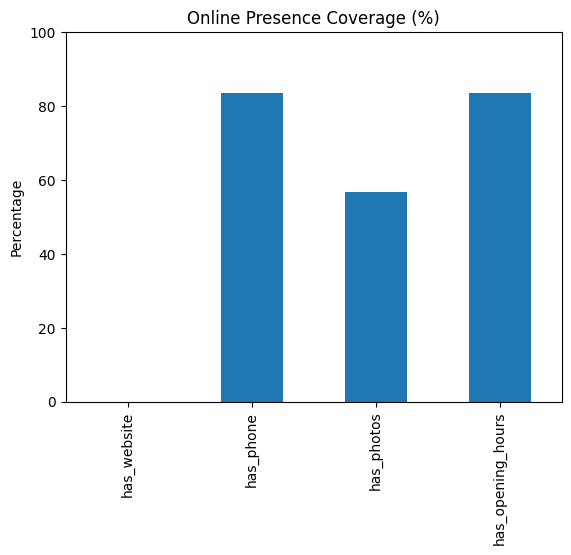

In [74]:
presence_cols = [
    'has_website',
    'has_phone',
    'has_photos',
    'has_opening_hours'
]

presence_rate = dataframe[presence_cols].mean() * 100
presence_rate.plot(kind='bar')
plt.title("Online Presence Coverage (%)")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.show()


In [75]:
dataframe["review_count"].unique().shape

(425,)

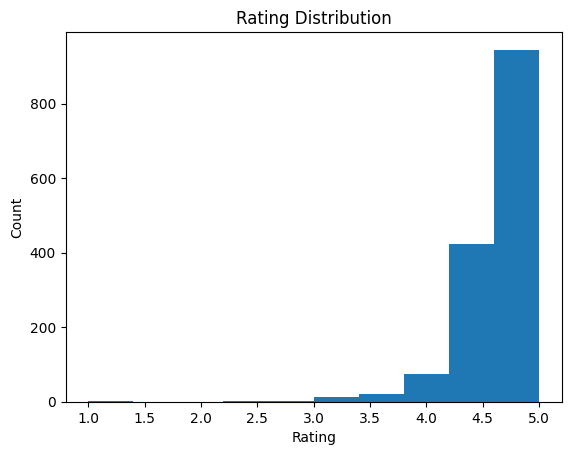

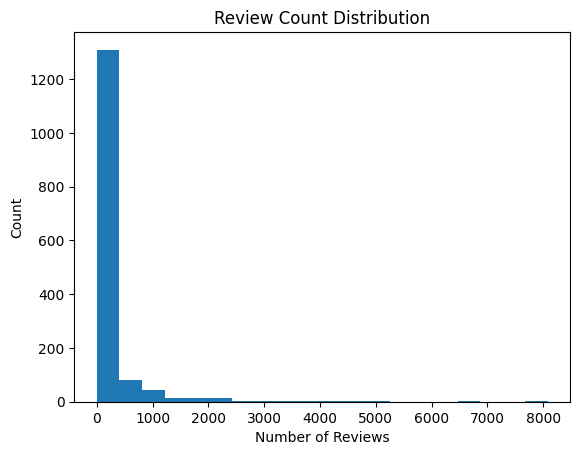

In [76]:
plt.hist(dataframe['rating'].dropna(), bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

plt.hist(dataframe['review_count'], bins=20)
plt.title("Review Count Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()


In [77]:
dataframe["review_count"].unique().shape

(425,)

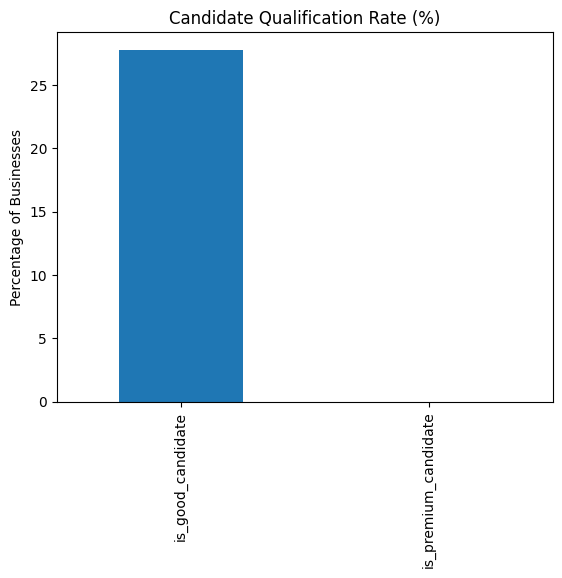

In [ ]:
candidate_counts = dataframe[['is_good_candidate', 'is_premium_candidate']].mean() * 100
candidate_counts.plot(kind='bar')
plt.title("Candidate Qualification Rate (%)")
plt.ylabel("Percentage of Businesses")
plt.show()

# nohay premium candidates por que hasta 3 imagenes por local nomas se guardaban. 
# Tengo que cambiar esa condicional.